<a href="https://colab.research.google.com/github/sandunmj/CapstoneProject/blob/main/RoomOccupancyPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Dataset

In [88]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
!unzip occupancy_data.zip

--2022-05-13 18:48:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 335713 (328K) [application/x-httpd-php]
Saving to: ‘occupancy_data.zip’

occupancy_data.zip  100%[===================>] 327.84K  1.54MB/s    in 0.2s    

2022-05-13 18:48:52 (1.54 MB/s) - ‘occupancy_data.zip’ saved [335713/335713]

Archive:  occupancy_data.zip
  inflating: datatest.txt            
  inflating: datatest2.txt           
  inflating: datatraining.txt        


## Data Observation

In [89]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [90]:
data = pd.read_csv('datatraining.txt')
print("Number of data rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

Number of data rows:  8143
Number of columns:  7


In [91]:
data.sample(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
3807,2015-02-07 09:16:59,20.000000,19.2675,133.0,458.250000,0.002778,0
6065,2015-02-08 22:54:59,19.500000,27.7900,0.0,444.000000,0.003892,0
5274,2015-02-08 09:43:59,19.434000,30.5600,28.0,429.000000,0.004265,0
4253,2015-02-07 16:43:00,20.790000,20.1500,14.0,440.500000,0.003052,0
5112,2015-02-08 07:01:59,19.200000,31.3900,0.0,432.333333,0.004318,0
5447,2015-02-08 12:36:59,19.700000,30.1500,90.5,422.000000,0.004278,0
559,2015-02-05 03:08:59,20.926667,24.8900,0.0,444.000000,0.003807,0
5845,2015-02-08 19:14:59,19.290000,27.7000,0.0,436.500000,0.003829,0
8016,2015-02-10 07:25:59,20.290000,33.0000,0.0,450.000000,0.004861,0
5066,2015-02-08 06:16:00,19.200000,31.6000,0.0,433.000000,0.004347,0


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


## Data cleaning

### Treating missing values

In [93]:
data.columns[data.isnull().any()]

Index([], dtype='object')

No null values were found in the dataset. Therefore, it is not required to handle null values.

### Treating outliers

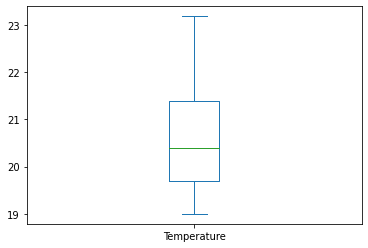

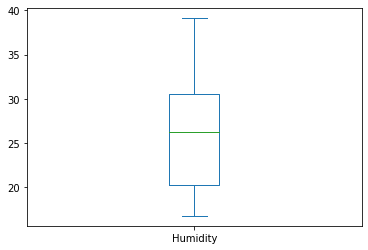

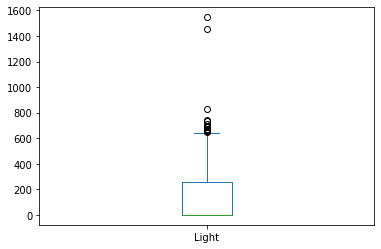

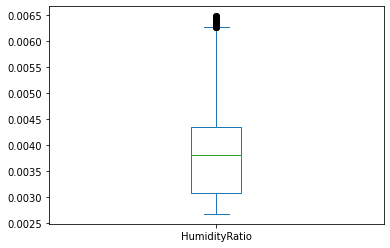

In [94]:
for column in ['Temperature', 'Humidity', 'Light', 'HumidityRatio']:
  plt.figure()
  data[column].plot(kind='box')
  plt.show()

Outliers were found in 'Light' and 'HumidityRatio' columns. Those outliers containing data rows are eliminated as follows.

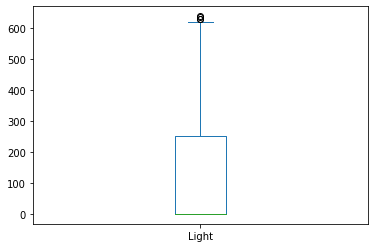

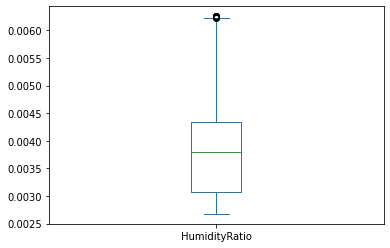

In [95]:
for column in ['Light', 'HumidityRatio']:
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1

  data=data[(data[column]>Q1-1.5*IQR) & (data[column]<Q3+1.5*IQR)]
  plt.figure()
  data[column].plot(kind='box')
  plt.show()

## Balancing dataset

This is a classification problem and the target column ('Occupancy') is the only categorical variable present. The value counts of 'Occupancy' column is observed.

In [96]:
data['Occupancy'].value_counts()

0    6410
1    1597
Name: Occupancy, dtype: int64

Since the value 0 row count is higher, data balancing technique was applied. This was done by downsampling the Occupancy = 0 rows.

In [97]:
data = data.drop(data[data['Occupancy'] == 0].sample(frac=.6).index)
data['Occupancy'].value_counts()

0    2564
1    1597
Name: Occupancy, dtype: int64

Now the training dataset is balanced.

## Feature selection

In [98]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000
mean,20.828097,25.664226,193.172711,673.210180,0.003903,0.383802
std,1.035118,5.394723,221.999744,317.311131,0.000837,0.486369
min,19.000000,16.790000,0.000000,412.750000,0.002682,0.000000
25%,20.000000,20.545000,0.000000,441.500000,0.003191,0.000000
50%,20.790000,26.200000,7.000000,471.000000,0.003811,0.000000
75%,21.700000,30.200000,444.000000,854.000000,0.004445,1.000000
max,23.180000,38.145000,638.000000,1879.250000,0.006257,1.000000


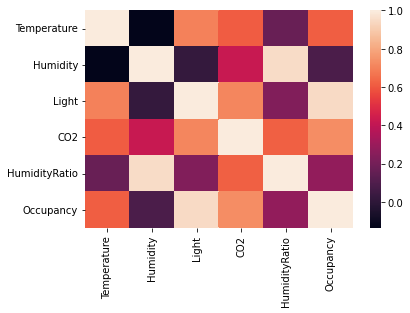

In [99]:
sns.heatmap(data.corr())

'Light', 'CO2' and 'Temperature' fatures have higher correlation with 'Occupancy' when comparing to other features. However, since there are only five features in the dataset, no feature is dropped in this step. Backward elimination will be used to identify the best set of features.

In [100]:
X_variables = ['Temperature', 'Humidity', 'Light', 'CO2','HumidityRatio']
y_variable = 'Occupancy'

print(F"X_variables = {X_variables}")
print(F"y_variable = {y_variable}")

X_variables = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
y_variable = Occupancy


## Model building

### Random Forrest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier

X_train = data[X_variables]
y_train = data[y_variable].values

RFClassifier1 = RandomForestClassifier().fit(X_train, y_train)

### Decision tree classifier

In [102]:
from sklearn.tree import DecisionTreeClassifier 

DTClassifier1 = DecisionTreeClassifier().fit(X_train,y_train)

### K-Nearest Neighbour Classifier

In [103]:
from sklearn.neighbors import KNeighborsClassifier

KNNClassifier1 = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)

## Model Evaluation

In [104]:
from sklearn import metrics

data_test = pd.read_csv("datatest.txt")
print(data_test.shape)

(2665, 7)


In [105]:
X_test = data_test[X_variables]
y_test = data_test[y_variable].values

In [106]:
y_pred_rfc = RFClassifier1.predict(X_test)
y_pred_dtc = DTClassifier1.predict(X_test)
y_pred_knnc = KNNClassifier1.predict(X_test)

Random Forrest Classifier

In [107]:
roc_auc = metrics.roc_auc_score(y_test, y_pred_rfc)
print(roc_auc)

results = metrics.classification_report(y_test, y_pred_rfc)
print(results)

0.9388607531860798
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1693
           1       0.94      0.91      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.94      0.94      2665
weighted avg       0.95      0.95      0.95      2665



Decision tree classifier

In [108]:
roc_auc = metrics.roc_auc_score(y_test, y_pred_dtc)
print(roc_auc)

results = metrics.classification_report(y_test, y_pred_dtc)
print(results)

0.8536223350081065
              precision    recall  f1-score   support

           0       0.86      0.97      0.92      1693
           1       0.94      0.74      0.82       972

    accuracy                           0.89      2665
   macro avg       0.90      0.85      0.87      2665
weighted avg       0.89      0.89      0.88      2665



Nearest Neighbor Classifier

In [109]:
roc_auc = metrics.roc_auc_score(y_test, y_pred_knnc)
print(roc_auc)

results = metrics.classification_report(y_test, y_pred_knnc)
print(results)

0.9340883181534229
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1693
           1       0.95      0.90      0.92       972

    accuracy                           0.94      2665
   macro avg       0.94      0.93      0.94      2665
weighted avg       0.94      0.94      0.94      2665



## Model Tuning

Backward elimination - elimination 'Humidity' feature due to lowest correlation with occupancy

In [110]:
X_variables = ['Temperature', 'Light', 'CO2', 'HumidityRatio']
y_variable = 'Occupancy'

print(F"X_variables = {X_variables}")
print(F"y_variable = {y_variable}")

X_train = data[X_variables]
y_train = data[y_variable].values

RFClassifier2 = RandomForestClassifier().fit(X_train, y_train)
DTClassifier2 = DecisionTreeClassifier().fit(X_train,y_train)
KNNClassifier2 = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)

X_variables = ['Temperature', 'Light', 'CO2', 'HumidityRatio']
y_variable = Occupancy


In [111]:
X_test = data_test[X_variables]

y_pred_rfc = RFClassifier2.predict(X_test)
y_pred_dtc = DTClassifier2.predict(X_test)
y_pred_knnc = KNNClassifier2.predict(X_test)

Random forrest classifier

In [112]:
roc_auc = metrics.roc_auc_score(y_test, y_pred_rfc)
print(roc_auc)

results = metrics.classification_report(y_test, y_pred_rfc)
print(results)

0.9434141186536671
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1693
           1       0.94      0.92      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.94      0.95      2665
weighted avg       0.95      0.95      0.95      2665



Decision tree classifier

In [113]:
roc_auc = metrics.roc_auc_score(y_test, y_pred_dtc)
print(roc_auc)

results = metrics.classification_report(y_test, y_pred_dtc)
print(results)

0.8987664651591278
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1693
           1       0.96      0.82      0.88       972

    accuracy                           0.92      2665
   macro avg       0.93      0.90      0.91      2665
weighted avg       0.92      0.92      0.92      2665



K-Nearest Neighbour Classifier

In [114]:
roc_auc = metrics.roc_auc_score(y_test, y_pred_knnc)
print(roc_auc)

results = metrics.classification_report(y_test, y_pred_knnc)
print(results)

0.9345264572835618
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1693
           1       0.94      0.90      0.92       972

    accuracy                           0.94      2665
   macro avg       0.94      0.93      0.94      2665
weighted avg       0.94      0.94      0.94      2665



## Model Saving


In [ ]:
import pickle

out_file = 'model_rfc.pickle'
pickle.dump(RFClassifier2, open(out_file, 'wb'))